In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['TeX Gyre Termes'],'size':10.0})
rc('axes',**{'labelsize':'large'})
rc('text', usetex=False)
rc('figure', figsize=(4,3))
rc('mathtext', fontset='stix')
rc('pdf',**{'fonttype': 42})
from cycler import cycler
linestyle_cycler = cycler('linestyle', ['-', '--', ':', '-.'])

In [3]:
from scipy.ndimage.filters import uniform_filter1d
from scipy.stats import linregress

In [4]:
def read_xvg(filename, *args, **kwargs):
    '''A little auxiliary function to read a GROMACS-produced XVG
    file, automatially skipping over the default xmgr formatting.'''
    
    skiplines = 0
    with open(filename, 'rt') as xvgfile:
        for line in xvgfile:
            if line[0] in ('#','@'):
                skiplines += 1
                continue
            else:
                break
            
    return np.loadtxt(filename, skiprows=skiplines, *args, **kwargs)

In [5]:
temp_data = read_xvg('temperature.xvg')
time = temp_data[:,0]
temp = temp_data[:,1]

In [6]:
volume = read_xvg('volume.xvg', usecols=[1])
density = read_xvg('density.xvg', usecols=[1])
pot_energy = read_xvg('pot_energy.xvg', usecols=[1])/100.0
kin_energy = read_xvg('kin_energy.xvg', usecols=[1])/100.0
tot_energy = read_xvg('tot_energy.xvg', usecols=[1])/100.0

In [7]:
WINDOW = 500
SMOOTH_DESC = '50 ps Average'
def smooth(dataset, window=WINDOW, mode='nearest'):
    return uniform_filter1d(dataset,window,mode=mode)

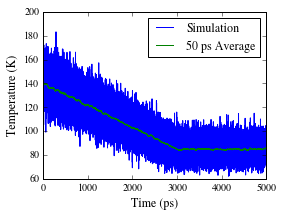

In [8]:
plot(time, temp, label='Simulation')
plot(time, smooth(temp), label=SMOOTH_DESC)
xlabel('Time (ps)')
ylabel('Temperature (K)')
legend(loc='best')

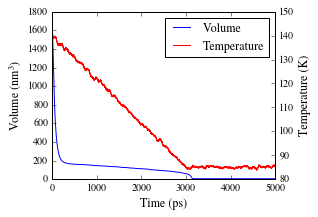

In [9]:
plot(time, smooth(volume), label='Volume')
xlabel('Time (ps)')
ylabel('Volume (nm$^3$)')

ax1 = gca()

ax2 = ax1.twinx()
ax2.plot(time, smooth(temp), color='red', label='Temperature')
ax2.set_ylabel('Temperature (K)')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='best')

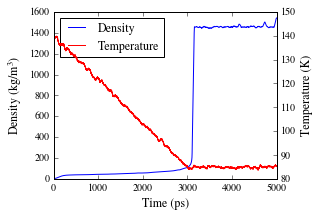

In [10]:
plot(time, smooth(density), label='Density')
xlabel('Time (ps)')
ylabel('Density (kg/m$^3$)')

ax1 = gca()

ax2 = ax1.twinx()
ax2.plot(time, smooth(temp), color='red', label='Temperature')
ax2.set_ylabel('Temperature (K)')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='best')

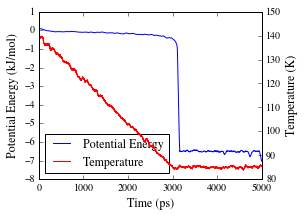

In [11]:
plot(time, smooth(pot_energy), label='Potential Energy')
xlabel('Time (ps)')
ylabel('Potential Energy (kJ/mol)')

ax1 = gca()

ax2 = ax1.twinx()
ax2.plot(time, smooth(temp), color='red', label='Temperature')
ax2.set_ylabel('Temperature (K)')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='best')

In [12]:
rsl_pre = linregress(time[5000:25000], pot_energy[5000:25000])
print(rsl_pre)
rsl_post = linregress(time[35000:], pot_energy[35000:])
print(rsl_post)

LinregressResult(slope=-8.7032319618302476e-05, intercept=-0.0061243515125271875, rvalue=-0.86246462556374937, pvalue=0.0, stderr=3.6115797460279052e-07)
LinregressResult(slope=-7.3927516571039212e-05, intercept=-6.2165161014266266, rvalue=-0.19173367247284775, pvalue=3.4778285382097196e-124, stderr=3.0898928710397156e-06)


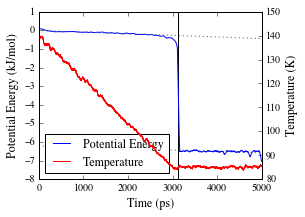

In [13]:
plot(time, smooth(pot_energy), label='Potential Energy')
xlabel('Time (ps)')
ylabel('Potential Energy (kJ/mol)')

plot(time, rsl_pre.slope*time + rsl_pre.intercept, color='green', linestyle=':')
plot(time, rsl_post.slope*time + rsl_post.intercept, color='green', linestyle=':')

vlines(3120,-8,1)

ax1 = gca()

ax2 = ax1.twinx()
ax2.plot(time, smooth(temp), color='red', label='Temperature')
ax2.set_ylabel('Temperature (K)')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower left')

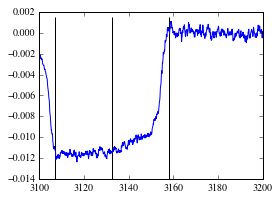

In [30]:
dV = np.diff(smooth(pot_energy))
midpoints = (time[1:] + time[:-1])/2
plot(midpoints, dV)
xlim(3100,3200)
vlines([3107,3132.5,3158],-0.014,0.0015)

Looks like the phase transition begins at 3107 ps and ends at 3158 ps

LinregressResult(slope=-0.00031331703706279258, intercept=1.722280010849836, rvalue=-0.83889146709209017, pvalue=0.0, stderr=1.437547726605977e-06)
LinregressResult(slope=-7.2065994656026673e-05, intercept=-5.1749797247324194, rvalue=-0.16651186995527217, pvalue=1.0278155394401438e-93, stderr=3.4845630362253648e-06)


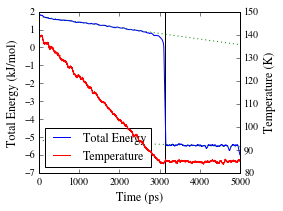

In [47]:
rsl_pre = linregress(time[5000:25000], tot_energy[5000:25000])
print(rsl_pre)
rsl_post = linregress(time[35000:], tot_energy[35000:])
print(rsl_post)
plot(time, smooth(tot_energy), label='Total Energy')
xlabel('Time (ps)')
ylabel('Total Energy (kJ/mol)')

plot(time, rsl_pre.slope*time + rsl_pre.intercept, color='green', linestyle=':')
plot(time, rsl_post.slope*time + rsl_post.intercept, color='green', linestyle=':')

vlines(3132.5,-7,2)

ax1 = gca()

ax2 = ax1.twinx()
ax2.plot(time, smooth(temp), color='red', label='Temperature')
ax2.set_ylabel('Temperature (K)')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower left')

tight_layout()

savefig('total_energy_fit.pdf')

In [32]:
trans_start = time[31070]
trans_mid = time[31325]
trans_end = time[31580]

In [33]:
initial_E = rsl_pre.intercept + rsl_pre.slope * trans_mid
final_E = rsl_post.intercept + rsl_post.slope * trans_mid
dE = final_E - initial_E
print('dE = {} kJ/mol'.format(dE))

dE = -6.141540845243061 kJ/mol


In [34]:
initial_E_1 = rsl_pre.intercept + rsl_pre.slope * trans_start
final_E_1 = rsl_post.intercept + rsl_post.slope * trans_start
dE_1 = final_E_1 - initial_E_1
print('dE(bound 1) = {} kJ/mol'.format(dE_1))

dE(bound 1) = -6.147692746824434 kJ/mol


In [35]:
initial_E_2 = rsl_pre.intercept + rsl_pre.slope * trans_end
final_E_2 = rsl_post.intercept + rsl_post.slope * trans_end
dE_2 = final_E_2 - initial_E_2
print('dE(bound 2) = {} kJ/mol'.format(dE_2))

dE(bound 2) = -6.135388943661689 kJ/mol


In [36]:
dE - dE_1

0.0061519015813722433

In [37]:
dE - dE_2

-0.0061519015813722433

$\Delta E = -6.145 \pm 0.006$ kJ/mol.

## Enthalpy

Here, the major source of error appears to be the curvature of the volume. For error analysis, rather than looking at Delta V over the energy range of the phase transition, we look at Delta V as a function of possible fits.

LinregressResult(slope=-0.03467484987438503, intercept=180.41318670183381, rvalue=-0.99659616656439431, pvalue=0.0, stderr=2.0282961280460783e-05)
LinregressResult(slope=-3.5806502295109812e-05, intercept=4.7003990413271115, rvalue=-0.1869374250492466, pvalue=4.870733631443531e-118, stderr=1.5364215438109111e-06)
dV1 = -67.20598429743502 nm^3


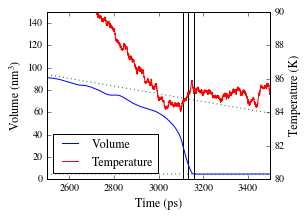

In [38]:
rsl_pre = linregress(time[5000:25000], volume[5000:25000])
print(rsl_pre)
rsl_post = linregress(time[35000:], volume[35000:])
print(rsl_post)

plot(time, smooth(volume), label='Volume')
plot(time, rsl_pre.slope*time + rsl_pre.intercept, color='green', linestyle=':')
plot(time, rsl_post.slope*time + rsl_post.intercept, color='green', linestyle=':')
xlabel('Time (ps)')
ylabel('Volume (nm$^3$)')

vlines([trans_start,trans_mid,trans_end],0,150)

ax1 = gca()

ax2 = ax1.twinx()
ax2.plot(time, smooth(temp), color='red', label='Temperature')
ax2.set_ylabel('Temperature (K)')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='best')
ax1.set_xlim(2500,3500)
ax1.set_ylim(0,150)
ax2.set_xlim(2500,3500)
ax2.set_ylim(80,90)

Vf1 = rsl_post.slope*trans_mid + rsl_post.intercept
Vi1 = rsl_pre.slope*trans_mid + rsl_pre.intercept
dV1 = Vf1 - Vi1
print('dV1 = {} nm^3'.format(dV1))

LinregressResult(slope=-0.088723818320787101, intercept=324.80616695386652, rvalue=-0.98783896980372021, pvalue=0.0, stderr=0.00031241516767193474)
LinregressResult(slope=-3.5806502295109812e-05, intercept=4.7003990413271115, rvalue=-0.1869374250492466, pvalue=4.870733631443531e-118, stderr=1.5364215438109111e-06)
dV2 = -42.290570891113234 nm^3


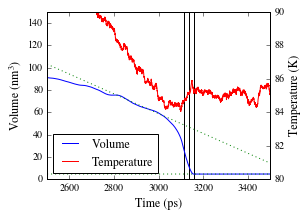

In [39]:
rsl_pre = linregress(time[28000:30000], volume[28000:30000])
print(rsl_pre)
rsl_post = linregress(time[35000:], volume[35000:])
print(rsl_post)

plot(time, smooth(volume), label='Volume')
plot(time, rsl_pre.slope*time + rsl_pre.intercept, color='green', linestyle=':')
plot(time, rsl_post.slope*time + rsl_post.intercept, color='green', linestyle=':')
xlabel('Time (ps)')
ylabel('Volume (nm$^3$)')

vlines([3115,3137.5,3160],0,150)

ax1 = gca()

ax2 = ax1.twinx()
ax2.plot(time, smooth(temp), color='red', label='Temperature')
ax2.set_ylabel('Temperature (K)')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='best')
ax1.set_xlim(2500,3500)
ax1.set_ylim(0,150)
ax2.set_xlim(2500,3500)
ax2.set_ylim(80,90)

Vf2 = rsl_post.slope*trans_mid + rsl_post.intercept
Vi2 = rsl_pre.slope*trans_mid + rsl_pre.intercept
dV2 = Vf2 - Vi2
print('dV2 = {} nm^3'.format(dV2))

LinregressResult(slope=-0.2038836053666454, intercept=672.71736189600017, rvalue=-0.98830451455105173, pvalue=0.0, stderr=0.00099581079690236828)
LinregressResult(slope=-3.5806502295109812e-05, intercept=4.7003990413271115, rvalue=-0.1869374250492466, pvalue=4.870733631443531e-118, stderr=1.5364215438109111e-06)
dV3 = -29.463732912095722 nm^3


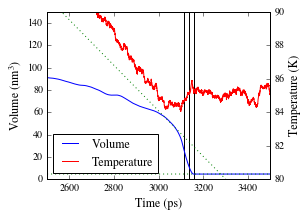

In [40]:
rsl_pre = linregress(time[30000:31000], volume[30000:31000])
print(rsl_pre)
rsl_post = linregress(time[35000:], volume[35000:])
print(rsl_post)

plot(time, smooth(volume), label='Volume')
plot(time, rsl_pre.slope*time + rsl_pre.intercept, color='green', linestyle=':')
plot(time, rsl_post.slope*time + rsl_post.intercept, color='green', linestyle=':')
xlabel('Time (ps)')
ylabel('Volume (nm$^3$)')

vlines([3115,3137.5,3160],0,150)

ax1 = gca()

ax2 = ax1.twinx()
ax2.plot(time, smooth(temp), color='red', label='Temperature')
ax2.set_ylabel('Temperature (K)')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='best')
ax1.set_xlim(2500,3500)
ax1.set_ylim(0,150)
ax2.set_xlim(2500,3500)
ax2.set_ylim(80,90)

Vf3 = rsl_post.slope*trans_mid + rsl_post.intercept
Vi3 = rsl_pre.slope*trans_mid + rsl_pre.intercept
dV3 = Vf3 - Vi3
print('dV3 = {} nm^3'.format(dV3))

$\Delta V = -(45 \pm 20)\ \mathrm{nm}^3$

In [41]:
dVbar = 6.022e23/100.0*45.0*1e-24
print('dVbar = {} L/mol'.format(dVbar))

dVbar = 0.27099 L/mol


In [45]:
dH = dE - dVbar # multiply by 10 bar but divide by 10 kJ per bar.L, so no change in magnitude
print('dH = {} kJ/mol'.format(dH))

dH = -6.412530845243062 kJ/mol


In [43]:
sdVbar = dVbar * (20.0/45.0)
sdVbar

0.12043999999999999

In [44]:
print('dH(vap) = {:4.2f} ± {:4.2f} kJ/mol'.format(-dH, sdVbar))

dH(vap) = 6.41 ± 0.12 kJ/mol
